# Determination of patterns that form the success of the game

![](https://i.ibb.co/h2wfnr3/Games-2000x1125.jpg)

Historical data on game sales, user and expert ratings, genres and platforms (for example, **Xbox** or **PlayStation**) are available from open sources. We need to identify the patterns that determine the success of the game. 


## General information about data in operation

### Loading and previewing data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
from scipy import stats as st
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


In [2]:
game_df = pd.read_csv('../input/videogamesales/vgsales.csv')
game_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
game_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


We observe NaN in the `Year`,`Publisher` The most critical gaps in the rating and rating columns, which are needed for analysis. The date set contains information about games released since 1980

### data describing:
- `Rank` - Ranking of overall sales

- `Name` - The games name

- `Platform` - Platform of the games release (i.e. PC,PS4, etc.)

- `Year` - Year of the game's release

- `Genre` - Genre of the game

- `Publisher` - Publisher of the game

- `NA_Sales` - Sales in North America (in millions)

- `EU_Sales` - Sales in Europe (in millions)

- `JP_Sales` - Sales in Japan (in millions)

- `Other_Sales` - Sales in the rest of the world (in millions)

- `Global_Sales` - Total worldwide sales.


## Summary

- at first glance, no anomalies were found
- in the columns `Year`,` Publisher` - We will study the passes and decide what to do with them.
- it is necessary to replace the data in the `Year` column -` float` with `int`. `datetime` does not need to be entered
- for the rest of the columns, additional study is no needed - good types of data

## Data preprocessing

### Replacing column names.

In [5]:
game_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Let's convert the column names to lowercase for ease of use

In [6]:
game_df.columns = game_df.columns.str.lower()
game_df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

### The presence of duplicates in the data


In [7]:
game_df.duplicated().sum()

0

No duplicates were found. You need to go to passes and their processing

### Counting and Handling NaNs

In [8]:
game_df.isna().mean().sort_values(ascending=False)

year            0.016327
publisher       0.003494
rank            0.000000
name            0.000000
platform        0.000000
genre           0.000000
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
global_sales    0.000000
dtype: float64

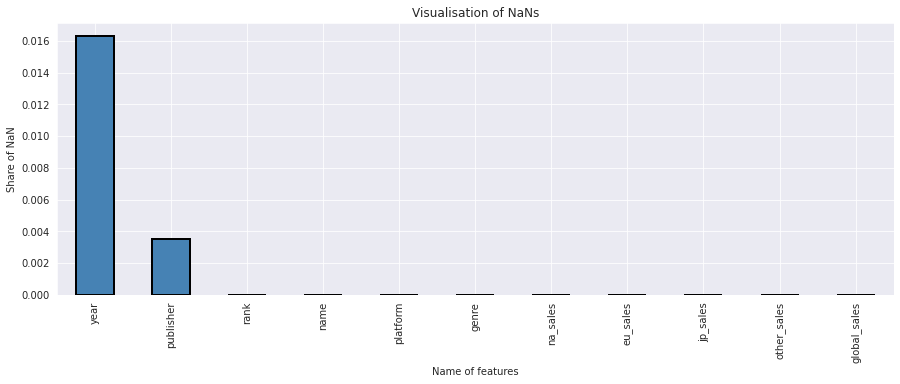

In [9]:
game_df.isna().mean().sort_values(ascending=False).plot(
                                                  kind='bar', figsize=(15,5), 
                                                  grid=True, color='steelblue', 
                                                  edgecolor='black', linewidth=2
                                                  )
plt.title('Visualisation of NaNs')
plt.xlabel('Name of features')
plt.ylabel('Share of NaN')
plt.show()

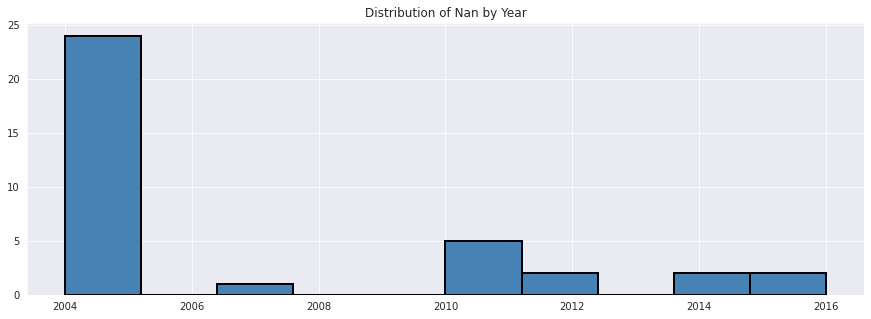

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(game_df.loc[game_df['publisher'].isna(), 'year'], 
         color='steelblue', edgecolor='black', linewidth=2
        )
plt.title('Distribution of Nan by Year')
plt.xlabel('')
plt.show()

Unfortunately, most of the gaps have been observed since 2000. This cannot be attributed to the absence of internet of other issues.

#### Feature `year`

Let's see the number of Nan of the `year` column:

In [11]:
len(game_df[game_df['year'].isna()])

271

In [12]:
game_df['year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

271 NaNs in the year column. We could do some research and restore the gaps, but that's 271 lines. Replace with `0`, after processing, create a new dataframe, excluding these lines

In [13]:
game_df['year'] = game_df['year'].fillna(0)
print('NaNs in year - {}'.format(
                                                   game_df['year'].isna().sum())
                                                   )

NaNs in year - 0


#### Feature `publisher`

In [14]:
print('Nan in publisher', len(game_df[game_df['publisher'].isna()]))


Nan in publisher 58


In [15]:
game_df[game_df['publisher'].isna()].head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
470,471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,0.0,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


I don not like Nan. Let us change it to `Unknown`

In [16]:
game_df['publisher'] = game_df['publisher'].fillna('unknown')

We will not delete lines. Exclude from analysis via `query ()`


#### Converting data to other types

In [17]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16598 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16598 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB



Let's replace the data types in the `year_of_release` columns with an integer one.

In [18]:
game_df['year'] = game_df[game_df['year'].notna()]['year'].astype('int64')
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16598 non-null  int64  
 4   genre         16598 non-null  object 
 5   publisher     16598 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


#### Cumulative sales across all regions

In [19]:
game_df ['total_sales'] = (
                          game_df['na_sales'] + 
                          game_df['eu_sales'] + 
                          game_df['jp_sales'] + 
                          game_df['other_sales']
)

In [20]:
game_df_upd = game_df[game_df['year']!= 0]
game_df_upd.head(15)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,29.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,28.61
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,28.31


In [21]:
game_df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16327 non-null  int64  
 1   name          16327 non-null  object 
 2   platform      16327 non-null  object 
 3   year          16327 non-null  int64  
 4   genre         16327 non-null  object 
 5   publisher     16327 non-null  object 
 6   na_sales      16327 non-null  float64
 7   eu_sales      16327 non-null  float64
 8   jp_sales      16327 non-null  float64
 9   other_sales   16327 non-null  float64
 10  global_sales  16327 non-null  float64
 11  total_sales   16327 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


#### Summary

Prepared the data.

Column names were converted to lower case, data types were replaced, and NaNs and duplicates were examined. The lines were decided not to be deleted, excluded via `query ()`. Added additional column `total_sales` to the dataframe.

## Exploratory data analysis


### Analysis of the number and sales of released games for the entire period

Let's take a look at the general information on released games for different platforms by year of release:

In [22]:

game_cross = pd.crosstab(game_df_upd['platform'], 
            game_df_upd['year'], margins=True, 
            margins_name="Total", 
           ).T
game_cross

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Total
year,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46
1982,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


If we look at the `Total` column, we see that the gaming industry has been actively developing since 1994.  

The peaks are in 2006 - 2011, then we see a decline and some leveling off since 2012 (from 500 to 652 games per year - close to the level of 2001 - 2006). This may be due to the development of games on mobile devices for Android or iOS - * mobile phones *, which are not in the list of platforms.

To simplify perception, we present a histogram grouped by name:

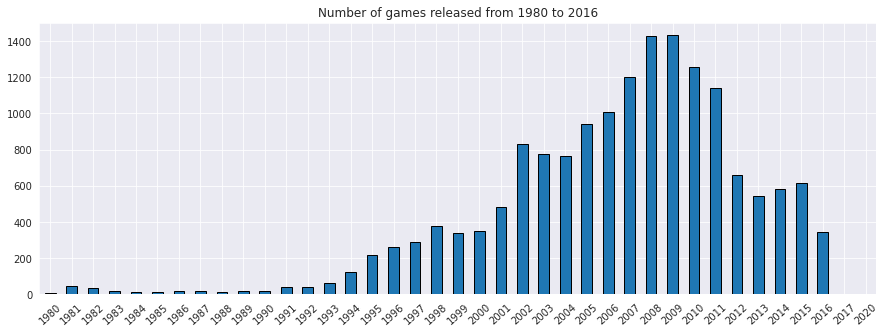

In [23]:
game_df_upd.groupby('year')['name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Number of games released from 1980 to 2016')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()
    

Let's look at the sales of games on various platforms in the period under review.

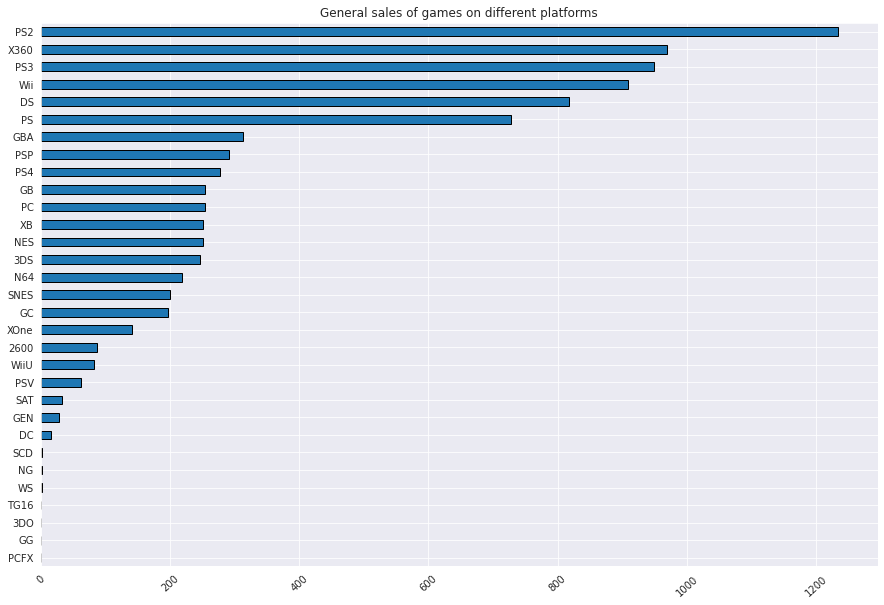

In [24]:
game_df_upd.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='total_sales', figsize=(15,10), edgecolor='black'
)
plt.title('General sales of games on different platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()
    

For convenience, let's highlight the top 10 sales platforms:

In [25]:
game_df_upd.groupby('platform')['total_sales'].sum().to_frame(
                                                        'total_sales').sort_values(
                                                        by='total_sales', ascending=False
                                                        ).head(10)

,total_sales
platform,
PS2,1233.56
X360,969.31
PS3,949.39
Wii,909.20
DS,817.94
PS,727.56
GBA,312.88
PSP,291.66
PS4,278.16


The leaders are PS2, PS3 and Xbox360. Wii and DS are also not far behind. 
Let us find life of time of each platform

In [26]:
list_of_platform = ['PS4', 'PC', '3DS', 'XOne']
games_not_new = game_df_upd.query('platform not in @list_of_platform').copy()
born_year = games_not_new.groupby('platform')['year'].agg(min)
deadline = games_not_new.groupby('platform')['year'].agg(max)
life_time = deadline - born_year
life_time.to_dict()
games_not_new['life_time'] = games_not_new['platform'].map(life_time)
games_not_new.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales,life_time
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,9
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,11
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,9
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,9
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,13


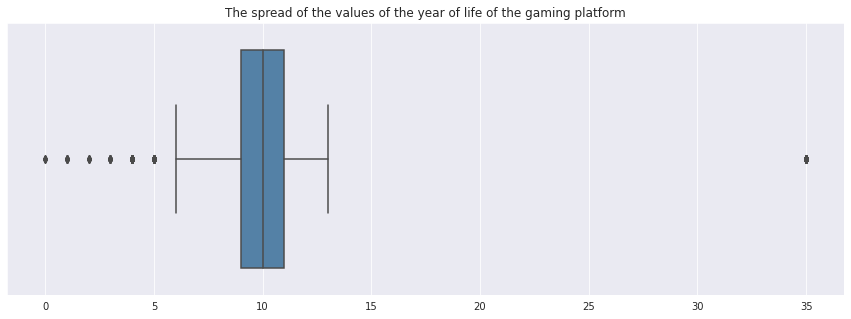

In [27]:
q75 = games_not_new['life_time'].quantile([.75])
q25 = games_not_new['life_time'].quantile([.25])
iqr = q75 - q25
low_range = q25 - (1.5 * iqr)
high_range = q75 + (1.5 * iqr)
plt.figure(figsize=(15, 5))
sns.boxplot(games_not_new['life_time'], color='steelblue')
plt.xlim = (low_range, high_range)
plt.title('The spread of the values ​​of the year of life of the gaming platform')
plt.xlabel('')
plt.show()


Eliminate outliers and look at the mean and median.

In [28]:
games_pivot = games_not_new.query('5 <= life_time <=15 ').pivot_table(index='platform', 
                         values='life_time').sort_values(
                         by='life_time', ascending=False
                        )
games_pivot.head(10)

,life_time
platform,
GB,13
PS2,11
X360,11
NES,11
PSP,11
PS3,10
DC,10
Wii,9
SNES,9


In [29]:
print('Median life of time: ', games_pivot['life_time'].median(), 'years')
print('Mean life of time: {:.1f}'.format(games_pivot['life_time'].mean()), 'years')


Median life of time:  9.0 years
Mean life of time: 8.9 years


Long-lived platforms include DS, Xbox360, PS2 and PS3, Wii. The lifespan of the platform is 9 years based on this estimate. At the same time, it should be understood that this does not mean a period of release of new [generations of consoles](https://ru.wikipedia.org/wiki/%D0%98%D0%B3%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%B2%D0%BA%D0%B0)- it means release time games for these platforms. On average, generations change once every 7 years.

DS wins over with its mobility and possibly plays on the nostalgia of grown-up gamers. When calculating, we excluded PCs and modern consoles such as PS4, Xbox One, 3DS. The PC as a platform exists independently - the only difference is in the system requirements for games.

Let's see how sales have changed in relation to the number of games released.

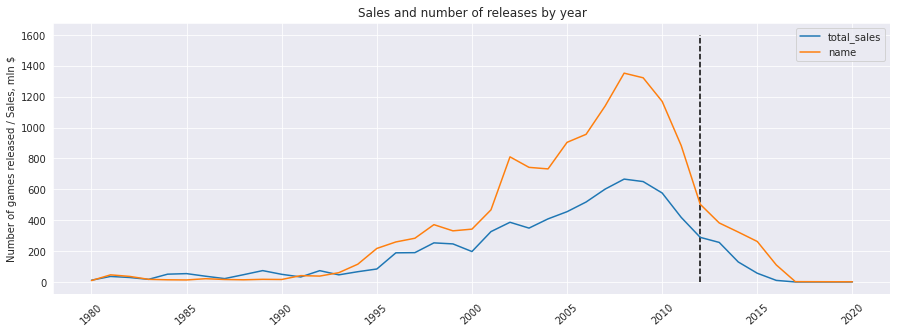

In [30]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
games_not_new.groupby('year')['total_sales'].sum().plot(
                                                                 legend=True, 
                                                                 title='Sales and number of releases by year'
                                                                 )
games_not_new.groupby('year')['name'].count().plot(legend=True, grid=True)

plt.ylabel('Number of games released / Sales, mln $')
ax.vlines(x=2012, linestyle='--', color='black', ymin=0, ymax=1600)
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

#### Conclusion
We see that modern game production has been actively developing since 2001, and this affects the revenue. We assume that this is due to the active development of console platforms, an increase in the performance of gaming hardware, which causes an increased demand for video entertainment.

Let's take the period from 2012 to 2016 - from the moment of a sharp drop in sales and the trend of a decrease in the number of games produced - in the year of the appearance of the first consoles [eighth generation](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9#%D0%92%D0%BE%D1%81%D1%8C%D0%BC%D0%BE%D0%B5_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_(%D1%81_2012))



### Analysis of the number and sales of released games for 2012-2016 (2017 - 2020 have many NaNs...not interesting for us)

In [31]:
games_12_16 = game_df_upd.query('2012 <=year <=2016').reset_index(drop=True)
games_12_16.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales
0,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,21.39
1,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,16.38
2,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,14.35
3,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,14.24
4,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,14.04


In [32]:
games_12_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2743 entries, 0 to 2742
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          2743 non-null   int64  
 1   name          2743 non-null   object 
 2   platform      2743 non-null   object 
 3   year          2743 non-null   int64  
 4   genre         2743 non-null   object 
 5   publisher     2743 non-null   object 
 6   na_sales      2743 non-null   float64
 7   eu_sales      2743 non-null   float64
 8   jp_sales      2743 non-null   float64
 9   other_sales   2743 non-null   float64
 10  global_sales  2743 non-null   float64
 11  total_sales   2743 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 257.3+ KB


In [33]:
pd.crosstab(games_12_16['platform'], 
            games_12_16['year'],
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

year,2012,2013,2014,2015,2016,total
platform,,,,,,
total,657,546,582,614,344,2743
PS3,148,127,108,74,32,489
PSV,54,63,102,113,60,392
3DS,93,91,79,86,35,384
PS4,0,16,75,137,107,335
X360,106,75,65,40,8,294
PC,61,38,44,50,38,231
XOne,0,19,61,79,54,213
PSP,106,54,10,3,0,173


We see a decrease in the number of games created on the old generation consoles and an increase in production for new consoles: PS4, XOne, WiiU.

Among the portable consoles, the 3DS can be distinguished.
PS vita (PSV), PSP - we are seeing a decline

In [34]:
lead_platforms = ['PS4', 'PC', 'XOne', '3DS']
lead_games = games_12_16.query('platform in @lead_platforms')

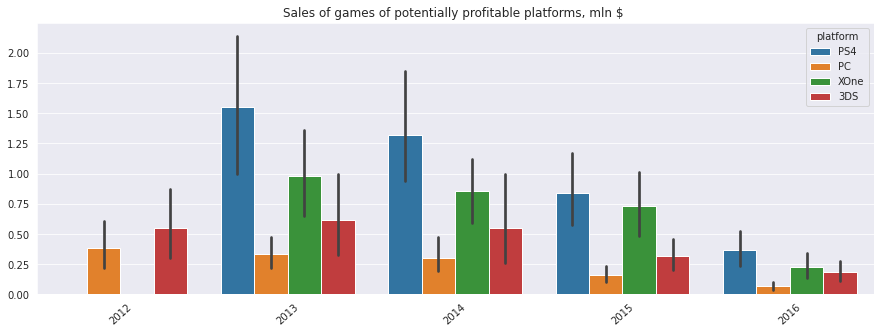

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(y='total_sales', 
            x='year', 
            hue='platform', 
            data = lead_games,
            hue_order = lead_platforms
           )

plt.title('Sales of games of potentially profitable platforms, mln $ ')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

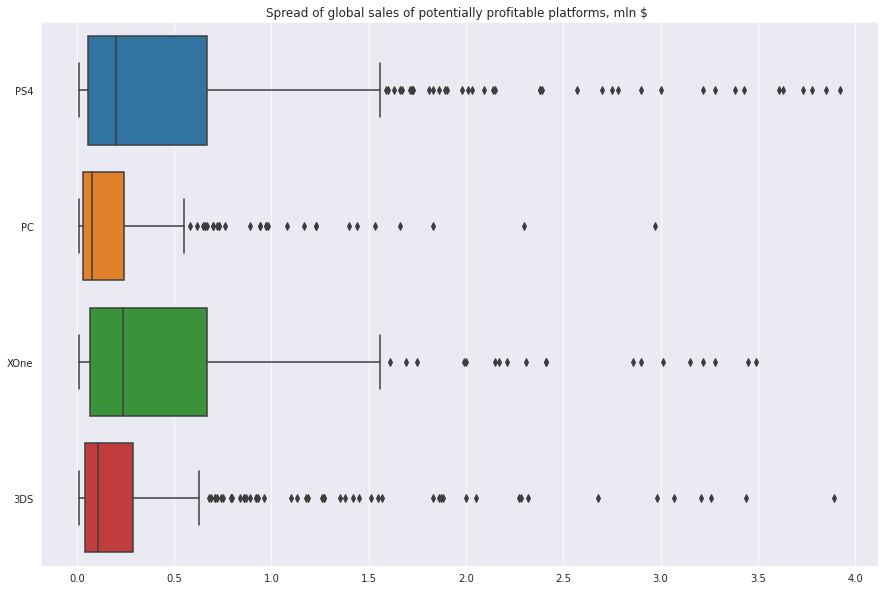

In [36]:
plt.figure(figsize=(15,10))

sns.boxplot(y='platform', x='total_sales',
            data = lead_games.query('total_sales < 4')
            ,order=lead_platforms, orient='h', 
           )
plt.title('Spread of global sales of potentially profitable platforms, mln $ ')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Colnclusion

Promising platforms are PS4, XOne, 3DS and PC. Despite the fact that we see a general decline - the leaders and the distribution of profits do not change. The PS4 and XOne are developing in about the same way, with the PS4 selling slightly better due to the availability of exclusive games, while Miscrosoft's policy is to play on the PC as well. The 3DS platform is also selling well, the PC is inferior to the console versions, which is associated with the need to update the *hardware* of the computer, which is much more expensive than buying a console

To eliminate outliers, when selecting values ​​for each platform, we will limit the total sales

### Analysis of games by genre

In [37]:
games_12_16

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales
0,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,21.39
1,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,16.38
2,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,14.35
3,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,14.24
4,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,14.04
...,...,...,...,...,...,...,...,...,...,...,...,...
2738,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01,0.01
2739,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01,0.01
2740,16574,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,Prototype,0.00,0.00,0.01,0.00,0.01,0.01
2741,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01,0.01


In [38]:
top_games = games_12_16.pivot_table(index='genre', columns='year'
                        ,values='total_sales',aggfunc='sum', margins=True).copy()
top_games.sort_values(by='All', ascending=False)

year,2012,2013,2014,2015,2016,All
genre,,,,,,
All,363.30,367.98,337.10,264.26,70.87,1403.51
Action,121.95,125.21,99.01,70.66,19.85,436.68
Shooter,72.84,62.73,65.99,66.12,18.17,285.85
Role-Playing,47.77,44.89,45.89,36.43,6.75,181.73
Sports,30.90,41.54,46.64,41.49,14.63,175.20
Misc,22.93,25.66,23.73,11.66,1.15,85.13
Platform,18.56,25.09,8.87,6.05,2.08,60.65
Racing,14.43,13.02,16.71,7.92,1.67,53.75
Fighting,9.53,7.23,16.15,7.78,3.85,44.54


The most popular genres are action and shooter, but puzzle is disappearing completely. Also, the popular genres include RPG, platform and sports. The largest drop in revenue was received by the action genre, shooter and RPG are developing more steadily

### Colnclusion

The gaming industry has been actively developing since 1994. It should be noted that the ESRP rating has been used since 1993. The peaks are in 2006 - 2011, then we see a decline and some leveling off since 2012 (from 500 to 652 games per year - close to the level of 2001 - 2006). This may be due to the development of games on mobile devices for Android or iOs. Over the past years, the rate of development has been falling, and profits have been falling.

The median lifespan of the platform is 10 years, while the time cycle for the announcement of a new console is approximately 6-7 years


Promising platforms are PS4, XOne, 3DS and PC. Despite the fact that we see a general decline - the leaders and the distribution of profits do not change. PS4 and XOne are developing in a similar fashion, with PS4 selling slightly better due to the availability of exclusive games, while Miscrosoft's policy is to play on PC as well. The 3DS platform is also selling well, the PC is inferior to the console versions, which is associated with the need to update the hardware of the computer, which is much more expensive than buying a console

The biggest drop in revenue was seen in the action genre, shooter and RPG are developing more steadily. At the moment, shooter is among the best sellers, but approximately equal to action. Thus - users are interested in action, RPG and shooter

## Exploring video game users by region


For convenience, let's display our dataframe

In [39]:
games_12_16.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,total_sales
0,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,21.39
1,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,16.38
2,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,14.35
3,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,14.24
4,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,14.04


Let's write a charting function for popular genres and platforms by region:

In [40]:
def diag_plot (data, column, region):
    region_data = games_12_16.groupby([column])[region].sum().sort_values(ascending=False).head()
    data = region_data
    
    data.plot(y=column, kind='bar', figsize=(15,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )

    
    plt.title('Distribution of platforms by revenue')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

### Region NA

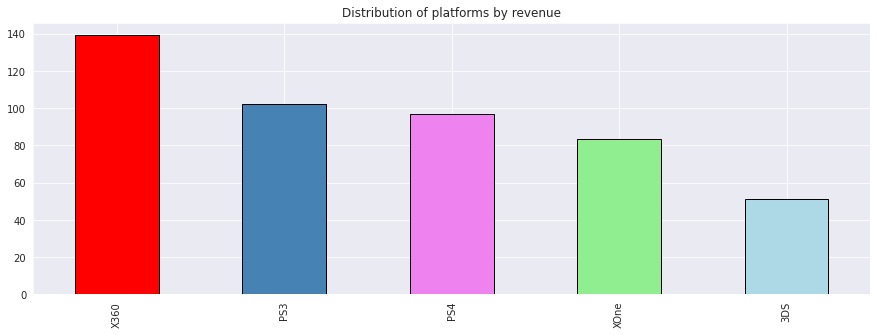

In [41]:
diag_plot(games_12_16, 'platform', 'na_sales')

In North America, the most popular platform is the X360 - where it comes from. At the same time, with the release of a new generation of consoles, the leadership goes to PS4. 3DS is the least popular console among the leaders

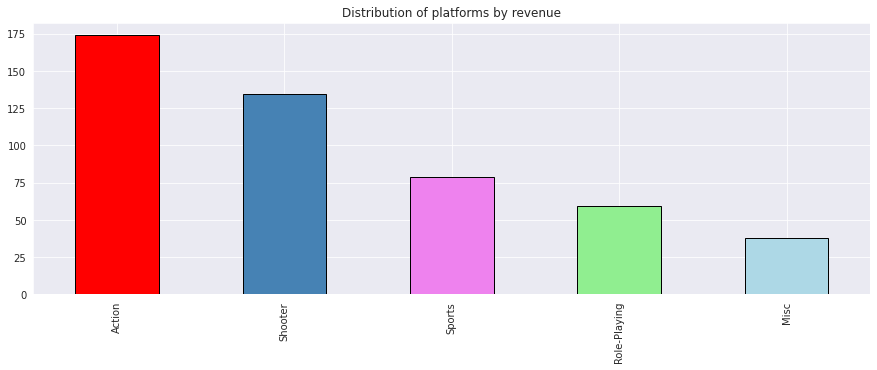

In [42]:
diag_plot(games_12_16, 'genre', 'na_sales')

As for genres, the most popular are action and shooter, closes the top three in the sport genre.

### Region EU

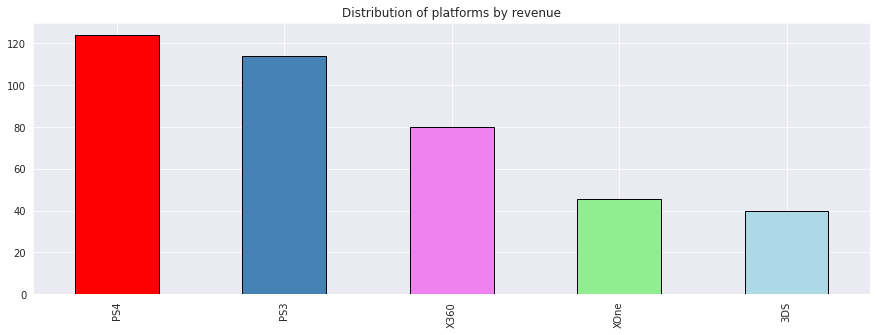

In [43]:
diag_plot(games_12_16, 'platform', 'eu_sales')

Among European users, PS4 and PS3 are leaders, Microsoft's console is much less successful than in North America

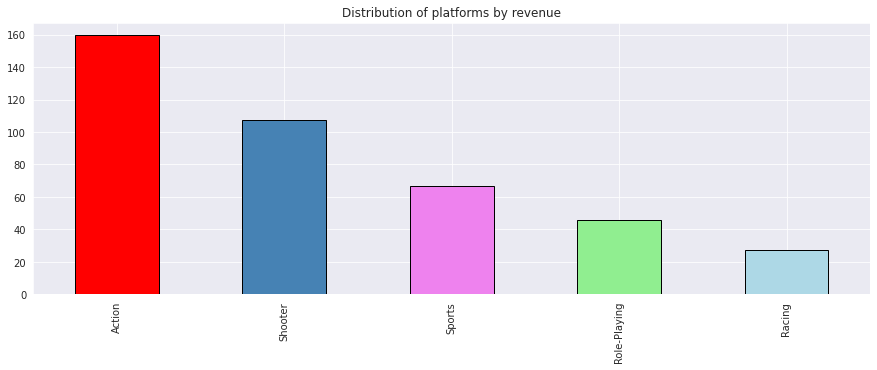

In [44]:
diag_plot(games_12_16, 'genre', 'eu_sales')

### Region JP

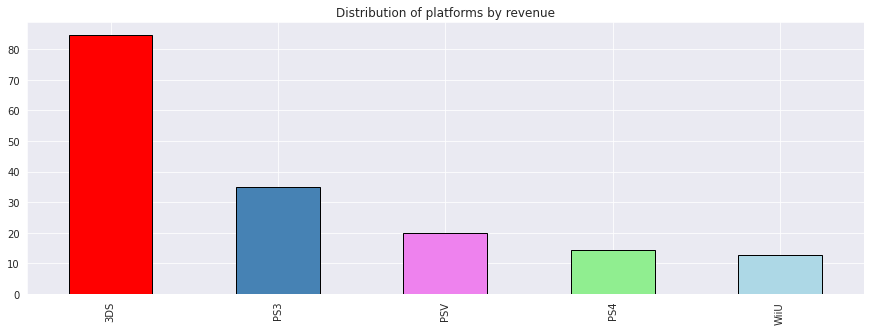

In [45]:
diag_plot(games_12_16, 'platform', 'jp_sales')

Japanese users prefer consoles from Nintendo and Sony. At the same time, as many as two portable consoles entered the top 5. Japanese users prefer local console makers

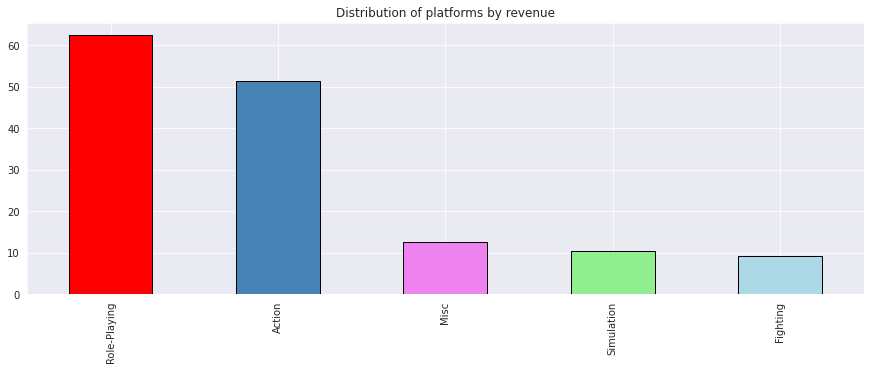

In [46]:
diag_plot(games_12_16, 'genre', 'jp_sales')

It is expected that Japanese users prefer RPGs (many famous RPGs originated from Japan, there is a separate subgenre - [jRPG](https://ru.wikipedia.org/wiki/%D0%AF%D0%BF%D0%BE%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D0%B8%D0%B3%D1%80%D0%B0)),next comes action.

If Europe and America are more or less similar in preference, then Japan clearly stands out at their level.
The Japanese often work a lot (over [60](https://rb.ru/story/karoshi/) hours per week) - with this approach - there will be no time for a home stationary console - perhaps that is why portable consoles are in the lead. In addition, Japanese housing is often small in size - choosing a portable platform will save space (there is no need to buy a monitor or TV and the console itself will not take up space)

As for RPGs, role-playing games offer the user immersion and passion for a long time, unlike shooters or action games, some immersion and juxtaposition of oneself and the character, which helps to distract from fatigue


### Colnclusion

In North America, the most popular platform is the X360 - where it comes from. At the same time, with the release of a new generation of consoles, the leadership goes to PS4. 3DS is the least popular console among the leaders.

Among European users, PS4 and PS3 are the leaders, Microsoft's console is much less successful than in North America, but both regions are similar in that 3ds is the least popular. 


Japanese users prefer consoles from Nintendo and Sony. At the same time, as many as two portable consoles entered the top 5. Japanese users prefer local console makers


In terms of genres, American and European users preferaction games and shooters, Japanese users prefer 3DS games and RPGs.

## Conclusion



**Promising platforms for 2017 + are Playstation 4 and Xbox One**. Nintendo's 3DS should only be considered if targeting the Japanese market. For the domestic market, the results of the European study are applicable. Accordingly, action and shooter will be promising genres - such games will most likely be in demand. Sports games are also popular - they should also be considered for marketing.

PC is less promising than consoles at the moment, which may be due to the development of online services for buying games - that is, the need for physical media is no longer needed.

In this way,

you need to focus on the 8th generation PS4 and Xbox One consoles, with the first in priority, and action and shooter games